# WeatherPy
----

### Analysis
* It is very apparent in this data that the latitude is very strongly correlated with the max temperature in any given city. More specifically, there is a positive correlation between the absolute value of the latitude and the max temperature, meaning as you get further away from the equator, the max temperature increases.
* There seems to be no particular relationship between city latitude and Humidity, with the exception of a dearth of low humidity cities within 20 degrees of the equator. Once you get 20 degrees north or south of the equator, the range of humidity ranges from 40 percent to 100 percent without a strong relationship between latitude and humidity.
* Continents do not seem to very strongly correlate with any of the factors tested here, with the exception of the relationships that already exist with Latitude.
* The data collected for clou cover is discrete, rather than continuous, and as such, it is not clear that the data would demonstrate as strong a relationship as the other factors might. In any case, the data presented do not seem to correlate between cloud cover and latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np
import requests
import datetime
import time
from pprint import pprint

#Import Date of Pull
now =datetime.datetime.now()
date = now.strftime("%m/%d/%Y")

# Import API key
from api_keys import api_key as key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputfile = "output/cities.csv"

#Import continent converting csv and make datafram. 
#This will allow the continents to be displayed in different colors on the graph
cont = pd.read_csv("continent.csv", keep_default_na=False)
cont = cont.rename(index=str, columns={'iso 3166 country':'Country', 'continent code': 'Continent'})

# define units as imperial
units = 'imperial'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pprint(len(cities))

613


In [3]:
#Define the base query url
qurl = "http://api.openweathermap.org/data/2.5/weather?appid=" + key + "&units=" + units + "&q="
# define lists for the variables tracked and the counter for the record count
humid = []
cloud =[]
wind = []
lat = []
lng = []
temp = []
citi = []
country = []
count = 1

# Loop through the city list and collect the variables needed.
# Also add the Error processing to print that it is skipping a city.
for city in cities:
    try:
        resp = requests.get(qurl + city).json()
        lat.append(resp['coord']['lat'])
        lng.append(resp['coord']['lon'])
        temp.append(resp['main']['temp_max'])
        humid.append(resp['main']['humidity'])
        cloud.append(resp['clouds']['all'])
        wind.append(resp['wind']['speed'])
        citi.append(resp['name'])
        country.append(resp['sys']['country'])
        print(f"Processing Record {count} for {city}")
        count = count + 1
    except KeyError:
        print("City not found, skipping")
        continue
# This delay line is probably unnecessary, but it is included so that the API doesn't get locked out.    
    time.sleep(.01)   

Processing Record 1 for bikin
City not found, skipping
Processing Record 2 for tabou
Processing Record 3 for lata
Processing Record 4 for ushuaia
Processing Record 5 for skjervoy
Processing Record 6 for punta arenas
Processing Record 7 for nantucket
Processing Record 8 for amahai
City not found, skipping
Processing Record 9 for tigil
Processing Record 10 for sale
Processing Record 11 for iqaluit
Processing Record 12 for rikitea
Processing Record 13 for salalah
Processing Record 14 for atuona
Processing Record 15 for avarua
Processing Record 16 for fairbanks
City not found, skipping
Processing Record 17 for lander
Processing Record 18 for jiwani
Processing Record 19 for gornyak
Processing Record 20 for geraldton
Processing Record 21 for jamestown
Processing Record 22 for chiang khong
Processing Record 23 for coquimbo
Processing Record 24 for sesheke
Processing Record 25 for rundu
Processing Record 26 for nouakchott
Processing Record 27 for longyearbyen
Processing Record 28 for bluff
Pro

Processing Record 222 for general pico
Processing Record 223 for auki
Processing Record 224 for cayenne
Processing Record 225 for nouadhibou
Processing Record 226 for hamilton
Processing Record 227 for soderhamn
Processing Record 228 for pevek
City not found, skipping
Processing Record 229 for lasa
Processing Record 230 for shirokiy
Processing Record 231 for comodoro rivadavia
Processing Record 232 for marinette
Processing Record 233 for trelleborg
Processing Record 234 for qaqortoq
Processing Record 235 for andros town
Processing Record 236 for yulara
Processing Record 237 for puerto narino
Processing Record 238 for klaksvik
Processing Record 239 for bilma
Processing Record 240 for tasiilaq
Processing Record 241 for tonantins
Processing Record 242 for deniliquin
Processing Record 243 for hickory
Processing Record 244 for victor harbor
Processing Record 245 for port-gentil
Processing Record 246 for katete
City not found, skipping
Processing Record 247 for gushikawa
Processing Record 24

Processing Record 442 for shakawe
Processing Record 443 for omboue
Processing Record 444 for uige
Processing Record 445 for nurobod
City not found, skipping
Processing Record 446 for leiyang
Processing Record 447 for long beach
Processing Record 448 for carora
Processing Record 449 for warwick
Processing Record 450 for alexandria
Processing Record 451 for sorong
Processing Record 452 for kosh-agach
Processing Record 453 for grindavik
City not found, skipping
Processing Record 454 for darhan
Processing Record 455 for luanda
Processing Record 456 for durazno
Processing Record 457 for pirapozinho
Processing Record 458 for broken hill
Processing Record 459 for katsuura
Processing Record 460 for chicama
Processing Record 461 for ayr
Processing Record 462 for iskateley
Processing Record 463 for kurayoshi
Processing Record 464 for mahibadhoo
Processing Record 465 for khorixas
Processing Record 466 for sarangani
Processing Record 467 for kenora
Processing Record 468 for chapayevka
Processing R

In [4]:
# Create dataframe of data collecting through the API calls
data = pd.DataFrame(
    {'City': citi,
    'Cloud Cover': cloud,
    'Country': country,
    'Humidity': humid,
    'Latitude': lat,
    'Longitude': lng,
    'Temperature': temp,
    'Wind Speed': wind})

#merge the dataframe from the API calls with the continent dataframe to add a column with the continent value.
data2=data.merge(cont, on='Country', how='left')
data2.to_csv(outputfile)
data2.head()

,City,Cloud Cover,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed,Continent
0,Bikin,8,RU,27,46.82,134.25,45.92,4.59,EU
1,Tabou,20,CI,100,4.42,-7.36,83.27,5.03,AF
2,Lata,0,IN,60,30.78,78.62,54.47,2.13,AS
3,Ushuaia,75,AR,93,-54.81,-68.31,41.00,19.46,SA
4,Skjervoy,92,NO,100,70.03,20.97,37.10,20.02,EU


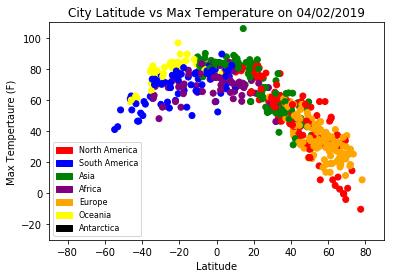

In [5]:
# This dictionary will allow us to map different continents to different colors in the plot. It's fun!
colors = {'NA': 'r', 'SA': 'b', 'AS': 'g', 'AF': 'purple', 'EU': 'orange', 'OC': 'yellow', 'AN': 'black'}

#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2.Temperature, color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='North America')
SA = mpatches.Patch(color='blue', label='South America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Max Temperature on {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Tempertaure (F)")
plt.xlim([-90,90])
plt.ylim([-30,110])

#Save the image to a file
plt.savefig('output/Temp.png')

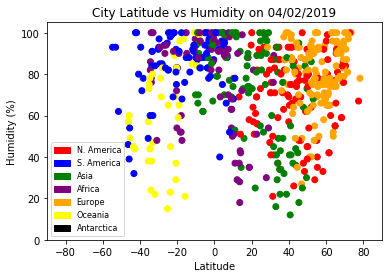

In [6]:
#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2.Humidity, color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red', label='N. America')
SA = mpatches.Patch(color='blue', label='S. America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Humidity on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-90,90])
plt.ylim([0,105])

#Save the image to a file
plt.savefig('output/Humidity.png')

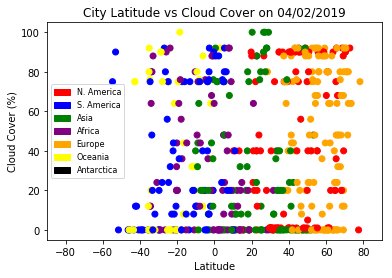

In [7]:
#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2['Cloud Cover'], color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='N. America')
SA = mpatches.Patch(color='blue', label='S. America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Cloud Cover on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.xlim([-90,90])
plt.ylim([-5,105])

#Save the image to a file
plt.savefig('output/Clouds.png')

In [ ]:
#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2['Wind Speed'], color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='North America')
SA = mpatches.Patch(color='blue', label='South America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Wind Speed on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim([-90,90])
plt.ylim([-2.5,50])

#Save the image to a file
plt.savefig('output/Wind.png')